# KNN

In [89]:
import pandas as pd
data_esporte = pd.read_csv('esporte.csv') # Comma Separated Values - Valores Separados Por Vírgula

In [90]:
data_esporte.head()

,Nome,Idade,Sexo,Esporte
0,Manuel,32,M,Futebol
1,Alberto,40,M,Basquete
2,Paula,16,F,Volei
3,Ana,34,F,Volei
4,Antonio,55,M,Basquete


### Considerando os dados acima, usando o KNN vamos encontrar qual seria a preferencia desportiva da Angelina que tem 5 anos de idade.

Para tanto, precisamos transformar os dados de Sexo para numérico. Assim, 0 é Masculino e 1 é Feminino.

In [91]:
data_esporte['Sexo'] = data_esporte['Sexo'].map({'M':0, 'F':1})

In [92]:
data_esporte

,Nome,Idade,Sexo,Esporte
0,Manuel,32,0,Futebol
1,Alberto,40,0,Basquete
2,Paula,16,1,Volei
3,Ana,34,1,Volei
4,Antonio,55,0,Basquete
5,Sandro,40,0,Volei
6,Idra,20,1,Basquete
7,Gelson,15,0,Volei
8,Amelia,55,1,Futebol
9,Umar,15,0,Futebol


### Calcular a distância euclidiana

$d(p,q) = \sqrt{\sum_{i=0}^{n}(p_i - q_i)^{2}}$

Usaremos k = 3.

$d(Angelina, Manuel) = \sqrt{(5 - 32) + (1-0)^2}$ = 27.02

### Faremos o mesmo para todos os pontos temos

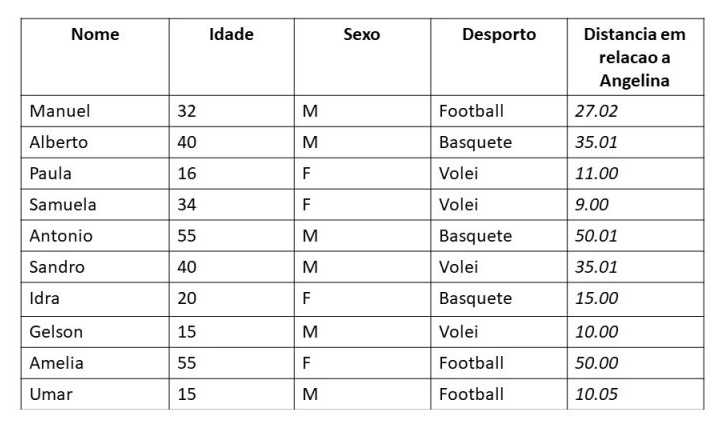

### Sabendo que k = 3 significa que devemos encontrar os 3 pontos mais próximos, temos:

Volei(Distância = 9.00); Volei(Distancia = 10); Futebol(Distancia = 10.05)

#### Conclui-se que a previsão de Angelina é Volei.

## KNN com sklearn

In [93]:
# Excluir as colunas que não serão utilizadas no modelo. No caso, Nome

data_esporte = data_esporte.drop(['Nome'], axis=1)

data_esporte


,Idade,Sexo,Esporte
0,32,0,Futebol
1,40,0,Basquete
2,16,1,Volei
3,34,1,Volei
4,55,0,Basquete
5,40,0,Volei
6,20,1,Basquete
7,15,0,Volei
8,55,1,Futebol
9,15,0,Futebol


In [94]:
#Transformar variável Esporte em numérica

data_esporte['Esporte'] = data_esporte['Esporte'].map({'Futebol':0, 'Volei':1, 'Basquete':2})

### vamos separar as colunas de características e qual deve ser prevista, que no caso, é o esporte

In [95]:
import numpy as np

X = np.array(data_esporte.iloc[:, 0:2])
y = np.array(data_esporte['Esporte'])

In [96]:
X

array([[32,  0],
       [40,  0],
       [16,  1],
       [34,  1],
       [55,  0],
       [40,  0],
       [20,  1],
       [15,  0],
       [55,  1],
       [15,  0]], dtype=int64)

### A fim de testar o modelo, vamos particionar o dataframe com 80% treino e 20%  teste

In [97]:
y

array([0, 2, 1, 1, 2, 1, 2, 1, 0, 0], dtype=int64)

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


In [100]:
## Realizando o processo de KNN como algoritmo de regressão
from sklearn.neighbors import KNeighborsRegressor

#treinamento do algoritmo com 3 vizinhos mais próximos
knn_model = KNeighborsRegressor(n_neighbors = 3)

knn_model.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predicoes = knn_model.predict(X_test)
mse = mean_squared_error(y_test, predicoes)
rmse = sqrt(mse)
rmse

0.9428090415820634

### isso significa que o algoritmo tem um alto erro. Ou seja, não teve as previsões semelhantes aos valores reais.

In [104]:
X_test



array([[32,  0],
       [15,  0]], dtype=int64)

In [105]:
predicoes

array([1.33333333, 1.        ])

### Testar com um exemplo de valor desconhecido. Ou seja, queremos prever qual seria o esporte escolhido por Angelina, sendo feature Idade = 5 anos e Sexo = Feminino (1)


In [106]:
exemploAngelina = [[5,1]]
print(knn_model.predict(exemploAngelina))

[1.]


#### 1 é volei!

### Como não sabemos se o problema é o número de vizinhos, visto que foi definido empiricamente, vamos testar vários valores e observar o menor erro.

In [133]:
## Execução do algoritmo

#criar uma lista de vizinhos com números ímpares para K. Vai de 1 a 5, stride de 2. 
vizinhos = list(range(1, 6, 2))

vizinhos

[1, 3, 5]

In [134]:
#criação da estrutura de litas para armazenar os valores das predições
lista_vizinhos = []

In [135]:
lista_predicoes = []
lista_rmse = []

In [136]:
for k in vizinhos:
    knn_model = KNeighborsRegressor(n_neighbors = k)
    knn_model.fit(X_train,y_train)
    predicoes = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, predicoes)
    rmse = sqrt(mse)
    lista_vizinhos.append(k)   
    lista_predicoes.append(predicoes)
    lista_rmse.append(rmse)

In [137]:
lista_vizinhos

[1, 3, 5]

In [138]:
lista_modelos

[KNeighborsRegressor(n_neighbors=1),
 KNeighborsRegressor(n_neighbors=3),
 KNeighborsRegressor()]

In [139]:
lista_predicoes

[array([1., 0.]), array([1.33333333, 1.        ]), array([1.4, 1. ])]

In [140]:
lista_rmse

[1.0, 0.9428090415820634, 0.9899494936611665]

In [141]:
# contrução do dataframe
df_1 = pd.DataFrame (lista_vizinhos, columns=['K vizinhos'])
df_4 = pd.DataFrame (lista_rmse, columns=['RMSE'])
df_knn = pd.concat([df_1, df_4], axis=1)

# retorna o menor erro obtido
menor_k = min(df_knn['RMSE'])

# retorna os valores de k e f do menor erro obtido
index_opt = df_knn[df_knn['RMSE'] == menor_k].index.tolist()

In [142]:
df_knn

,K vizinhos,RMSE
0,1,1.000000
1,3,0.942809
2,5,0.989949


In [ ]:
x2 = predicoes
Y2 = y_test
plt.figure(figsize=(20,5))
plt.plot(x2, linewidth=2, color='r')
plt.plot(Y2, linewidth=0.5,color='b')
plt.title('Valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()